# Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [142]:
import pandas as pd 
import pickle
import numpy as np 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt 
%matplotlib inline

In [26]:
with open('/Users/windflower715/nyc18_ds14/cleaneddf.pkl','rb') as file:
    df = pickle.load(file)
df.columns

Index(['address', 'bath', 'beds', 'hopscore', 'monthlyrent', 'neighborhood',
       'sqft', 'train', 'Doorman', 'Elevator', 'Laundryinbuilding',
       'Catsallowed', 'Dogsallowed', 'Light', 'Storage', 'Laundryinunit',
       'Liveinsuper', 'Parking', 'Garden', 'Gym', 'Swimmingpool', 'Midtown',
       'Downtown', 'Upper_east', 'Upper_west', 'Uptown', 'logmonthlyrent'],
      dtype='object')

In [47]:
y = df['monthlyrent']
y.shape

(2584,)

In [64]:
#make a column vector that fits y's shape
X  = np.ones((2584,1),dtype = int)
X.shape

(2584, 1)

In [81]:
# model = sm.OLS(y,X)
# fit = model.fit()
# fit.summary()

model = LinearRegression()
model.fit(X,y)
predictions = model.predict(X)
model.score(X,y)

0.0

In [49]:
#the model gave an r squared of 0, which meaning it explains none of the variability of the data around its mean
#basically the model is trying to predict monthly rental price based the sample data mean

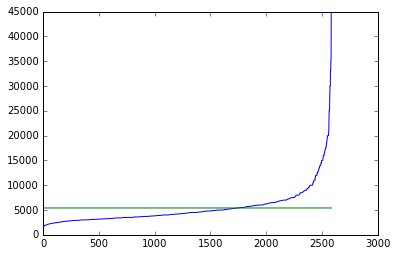

In [82]:
predictions = model.predict(X)
plt.plot(sorted(y))
plt.plot(predictions)
plt.show()

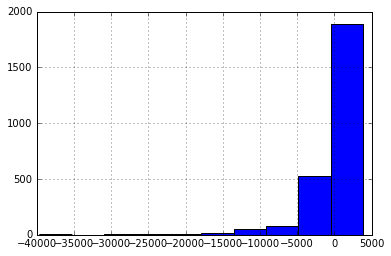

In [86]:
resid = (predictions - y)
resid.hist()

In [ ]:
#The residual's distribution shows a log pattern, meaning the model fails to predict the observations away from the mean

# Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [111]:
X = df['sqft']
y = df['monthlyrent']
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            monthlyrent   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 1.988e+04
Date:                Sun, 28 Jan 2018   Prob (F-statistic):               0.00
Time:                        15:22:15   Log-Likelihood:                -23607.
No. Observations:                2584   AIC:                         4.722e+04
Df Residuals:                    2583   BIC:                         4.722e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
sqft           5.2118      0.037    140.997      0.000         5.139     5.284
==============================================================================
Omnibus:                     2294.906   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           151981.155
Skew:                           3.899   Prob(JB):                         0.00
Kurtosis:                      39.753   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
#make two new columns in the dataframe for the prediction and residual result
df['predict2']=fit.predict(X)
df['resid2']= y-df.predict2

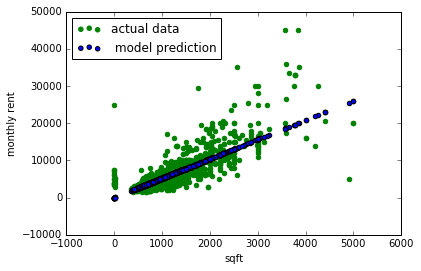

In [127]:
plt.scatter(df.sqft,y, color = 'green', label = 'actual data')
plt.scatter(df.sqft,df.predict2, label = ' model prediction')
plt.legend(loc='upper left')
plt.xlabel('sqft')
plt.ylabel('monthly rent')
plt.show()


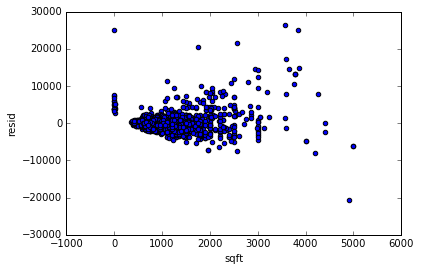

In [125]:
plt.scatter(df.sqft,df.resid2)
plt.xlabel('sqft')
plt.ylabel('resid')

# Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?




In [133]:
X = df[['sqft','Midtown']]
y = df['monthlyrent']
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            monthlyrent   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Sun, 28 Jan 2018   Prob (F-statistic):               0.00
Time:                        15:42:52   Log-Likelihood:                -23586.
No. Observations:                2584   AIC:                         4.718e+04
Df Residuals:                    2582   BIC:                         4.719e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
sqft           5.4133      0.048    112.985      0.000         5.319     5.507
Midtown     -519.3584     79.464     -6.536      0.000      -675.179  -363.538
==============================================================================
Omnibus:                     2169.906   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139827.146
Skew:                           3.559   Prob(JB):                         0.00
Kurtosis:                      38.327   Cond. No.                     2.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#The model r squared increased, indicating it's now able to fit the data better 

# Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.


In [137]:
lm1 = smf.ols('logmonthlyrent~ bath + beds + hopscore + sqft + train+ Doorman + Laundryinbuilding+Light+Swimmingpool', data=df)
fit1 = lm1.fit()
fit1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         logmonthlyrent   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     936.5
Date:                Sun, 28 Jan 2018   Prob (F-statistic):               0.00
Time:                        15:58:01   Log-Likelihood:                 91.513
No. Observations:                2584   AIC:                            -163.0
Df Residuals:                    2574   BIC:                            -104.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             7.8440      0.065    121.038      0.000         7.717     7.971
bath                  0.2485      0.011     22.062      0.000         0.226     0.271
beds                  0.0070      0.007      1.058      0.290        -0.006     0.020
hopscore             -0.0039      0.001     -5.039      0.000        -0.005    -0.002
sqft                  0.0005   1.42e-05     32.542      0.000         0.000     0.000
train                -0.1237      0.039     -3.157      0.002        -0.201    -0.047
Doorman               0.1800      0.012     15.550      0.000         0.157     0.203
Laundryinbuilding    -0.1201      0.011    -11.236      0.000        -0.141    -0.099
Light                -0.0548      0.011     -5.199      0.000        -0.076    -0.034
Swimmingpool          0.0709      0.014      4.917      0.000         0.043     0.099
==============================================================================
Omnibus:                      323.385   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2045.092
Skew:                           0.407   Prob(JB):                         0.00
Kurtosis:                       7.282   Cond. No.                     1.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.

In [140]:
X= df[[ 'bath', 'beds', 'hopscore',
       'sqft', 'train', 'Doorman', 'Elevator', 'Laundryinbuilding',
       'Catsallowed', 'Dogsallowed', 'Light', 'Storage', 'Laundryinunit',
       'Liveinsuper', 'Parking', 'Garden', 'Gym', 'Swimmingpool', 'Midtown',
       'Downtown', 'Upper_east', 'Upper_west', 'Uptown']]
y = df['logmonthlyrent']

In [145]:
lr = LinearRegression()
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25)
model = lr.fit(X_train,y_train)
model.score(X_test,y_test)

0.75145706187813865